# K Nearest Neighbors Classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# open file and store data into "dataset" variable
file = 'datasets/dataset.csv'
dataset = pd.read_csv(file, header = None)

## Functions definitions

In [2]:
# Function used for scaling of the dataset
def feature_scaling(X_train, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

# Function used to calculate the loss
def calculate_loss(pred_output, true_output):
  sq_error = (true_output - pred_output) ** 2
  sum_sq_error = np.sum(sq_error)
  loss = sum_sq_error / len(true_output)
  return loss

## Splitting the dataset

In [3]:
# dividing input (X) and output (y) data
X = dataset.iloc[: , :-1]
y = dataset.iloc[:, [2]]

# splitting the dataset into train and test data with 50-50%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)
X_train, X_test = feature_scaling(X_train, X_test)


## Function for knn Classifier

In [4]:
# Knn Classifier function for k neighbors. Fit -> Predict -> Accuracy Score
def knn_classifier(k, X_train, y_train, X_test, y_test):
    print('Nearest Neighbors Classifier results k = ', k, '\n\n')
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    y_pred_k = knn_k.predict(X_test)
    accuracy_k = accuracy_score(y_test, y_pred_k)

    # mean_classification_error = mean_absolute_error(y_test, y_pred_k)

    # Define KFold cross-validation
    num_folds = 5  # Number of folds (can be adjusted)
    k_fold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Perform cross-validation
    classification_errors = cross_val_score(knn_k, X_train, y_train, cv=k_fold, scoring='accuracy')

    # Calculate the mean classification error
    mean_classification_error = 1 - classification_errors.mean()

    # Classification report
    print('Classification Report\n\n')
    print(classification_report(y_test, y_pred_k))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_k)
    print('Confusion matrix\n\n', cm)
    print('\n\n')

    return accuracy_k, mean_classification_error, knn_k

## Plot Function

In [5]:
# Create a meshgrid to plot decision boundaries
def plot_decision_boundary(X, y, classifier, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class for each point in the meshgrid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    # Plot the actual data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

## Applying the Classifier and plotting the results for k = 1, ..., 10

Nearest Neighbors Classifier results k =  1 


Classification Report


              precision    recall  f1-score   support

           1       0.79      0.82      0.81        56
           2       0.86      0.80      0.83        46
           3       0.90      0.92      0.91        38

    accuracy                           0.84       140
   macro avg       0.85      0.85      0.85       140
weighted avg       0.84      0.84      0.84       140

Confusion matrix

 [[46  6  4]
 [ 9 37  0]
 [ 3  0 35]]



Accuracy with 1 neighbor: 0.8429
Mean Classification Error with 1 neighbor: 0.1500


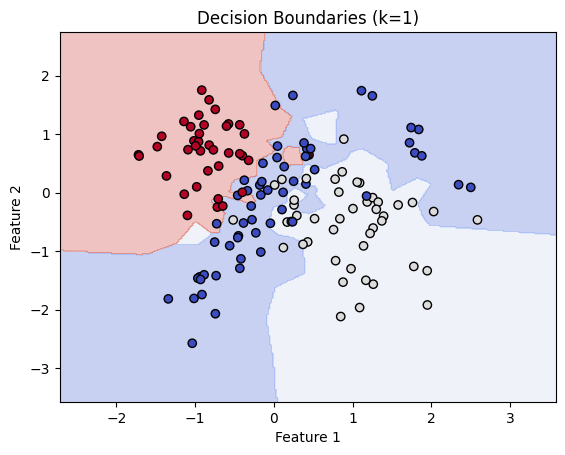

Nearest Neighbors Classifier results k =  2 


Classification Report


              precision    recall  f1-score   support

           1       0.77      0.91      0.84        56
           2       0.90      0.76      0.82        46
           3       0.94      0.87      0.90        38

    accuracy                           0.85       140
   macro avg       0.87      0.85      0.85       140
weighted avg       0.86      0.85      0.85       140

Confusion matrix

 [[51  3  2]
 [11 35  0]
 [ 4  1 33]]



Accuracy with 2 neighbor: 0.8500
Mean Classification Error with 2 neighbor: 0.1571


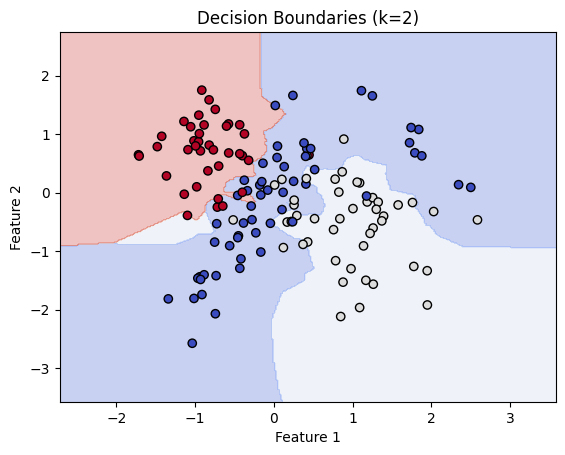

Nearest Neighbors Classifier results k =  3 


Classification Report


              precision    recall  f1-score   support

           1       0.86      0.88      0.87        56
           2       0.89      0.85      0.87        46
           3       0.95      0.97      0.96        38

    accuracy                           0.89       140
   macro avg       0.90      0.90      0.90       140
weighted avg       0.89      0.89      0.89       140

Confusion matrix

 [[49  5  2]
 [ 7 39  0]
 [ 1  0 37]]



Accuracy with 3 neighbor: 0.8929
Mean Classification Error with 3 neighbor: 0.1429


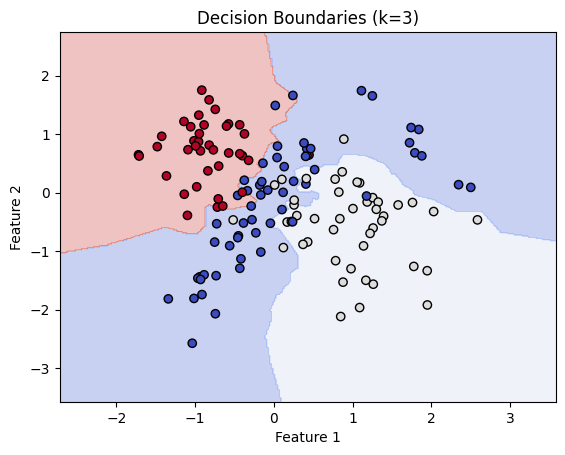

Nearest Neighbors Classifier results k =  4 


Classification Report


              precision    recall  f1-score   support

           1       0.80      0.93      0.86        56
           2       0.90      0.78      0.84        46
           3       1.00      0.92      0.96        38

    accuracy                           0.88       140
   macro avg       0.90      0.88      0.89       140
weighted avg       0.89      0.88      0.88       140

Confusion matrix

 [[52  4  0]
 [10 36  0]
 [ 3  0 35]]



Accuracy with 4 neighbor: 0.8786
Mean Classification Error with 4 neighbor: 0.1571


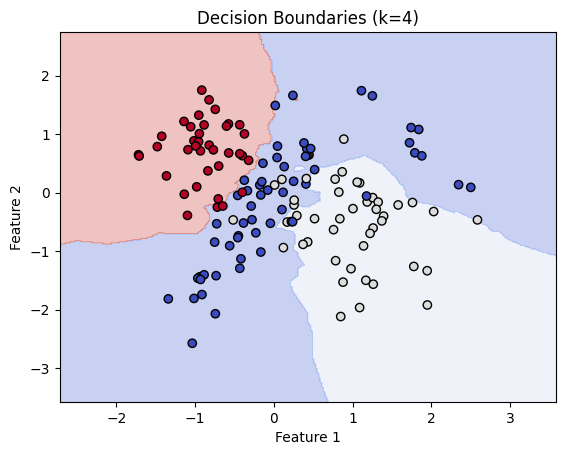

Nearest Neighbors Classifier results k =  5 


Classification Report


              precision    recall  f1-score   support

           1       0.84      0.91      0.87        56
           2       0.90      0.83      0.86        46
           3       0.97      0.95      0.96        38

    accuracy                           0.89       140
   macro avg       0.90      0.89      0.90       140
weighted avg       0.90      0.89      0.89       140

Confusion matrix

 [[51  4  1]
 [ 8 38  0]
 [ 2  0 36]]



Accuracy with 5 neighbor: 0.8929
Mean Classification Error with 5 neighbor: 0.1571


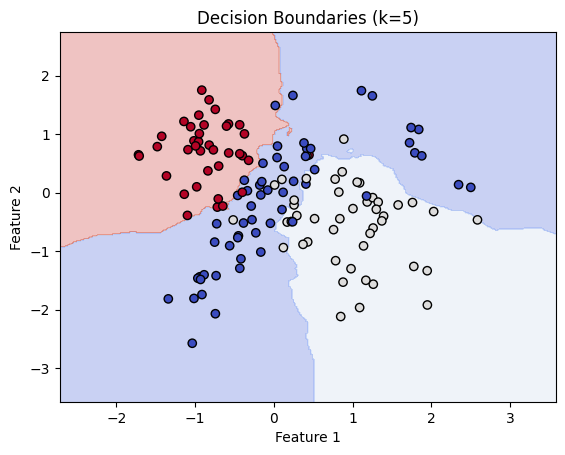

Nearest Neighbors Classifier results k =  6 


Classification Report


              precision    recall  f1-score   support

           1       0.77      0.95      0.85        56
           2       0.92      0.74      0.82        46
           3       1.00      0.89      0.94        38

    accuracy                           0.86       140
   macro avg       0.90      0.86      0.87       140
weighted avg       0.88      0.86      0.86       140

Confusion matrix

 [[53  3  0]
 [12 34  0]
 [ 4  0 34]]



Accuracy with 6 neighbor: 0.8643
Mean Classification Error with 6 neighbor: 0.1500


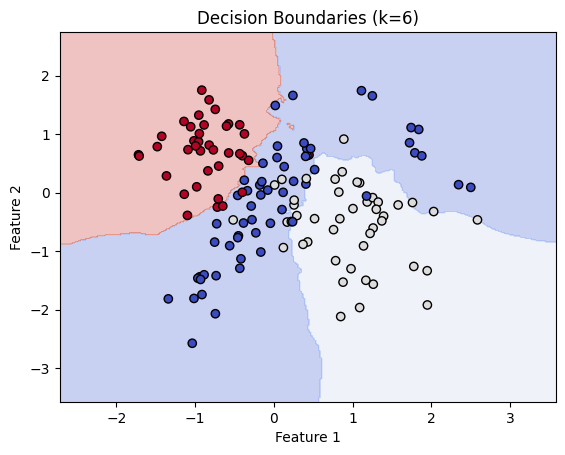

Nearest Neighbors Classifier results k =  7 


Classification Report


              precision    recall  f1-score   support

           1       0.77      0.89      0.83        56
           2       0.90      0.76      0.82        46
           3       0.94      0.89      0.92        38

    accuracy                           0.85       140
   macro avg       0.87      0.85      0.86       140
weighted avg       0.86      0.85      0.85       140

Confusion matrix

 [[50  4  2]
 [11 35  0]
 [ 4  0 34]]



Accuracy with 7 neighbor: 0.8500
Mean Classification Error with 7 neighbor: 0.1357


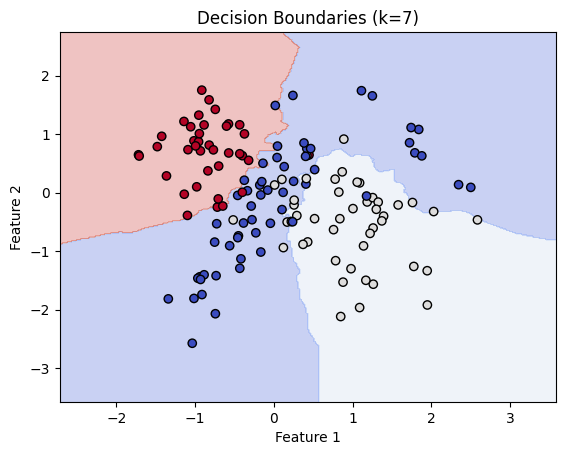

Nearest Neighbors Classifier results k =  8 


Classification Report


              precision    recall  f1-score   support

           1       0.76      0.96      0.85        56
           2       0.97      0.72      0.82        46
           3       0.97      0.89      0.93        38

    accuracy                           0.86       140
   macro avg       0.90      0.86      0.87       140
weighted avg       0.89      0.86      0.86       140

Confusion matrix

 [[54  1  1]
 [13 33  0]
 [ 4  0 34]]



Accuracy with 8 neighbor: 0.8643
Mean Classification Error with 8 neighbor: 0.1429


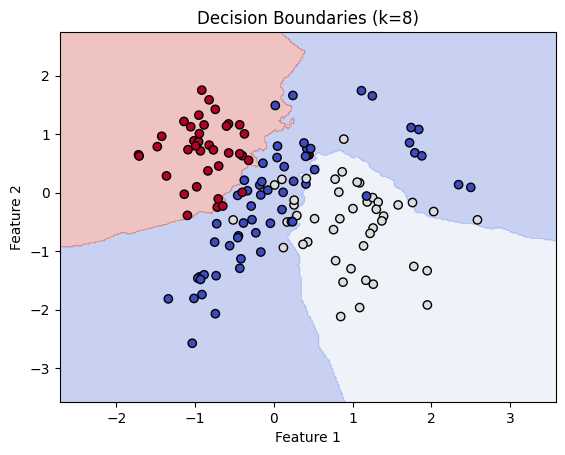

Nearest Neighbors Classifier results k =  9 


Classification Report


              precision    recall  f1-score   support

           1       0.79      0.88      0.83        56
           2       0.90      0.78      0.84        46
           3       0.92      0.92      0.92        38

    accuracy                           0.86       140
   macro avg       0.87      0.86      0.86       140
weighted avg       0.86      0.86      0.86       140

Confusion matrix

 [[49  4  3]
 [10 36  0]
 [ 3  0 35]]



Accuracy with 9 neighbor: 0.8571
Mean Classification Error with 9 neighbor: 0.1571


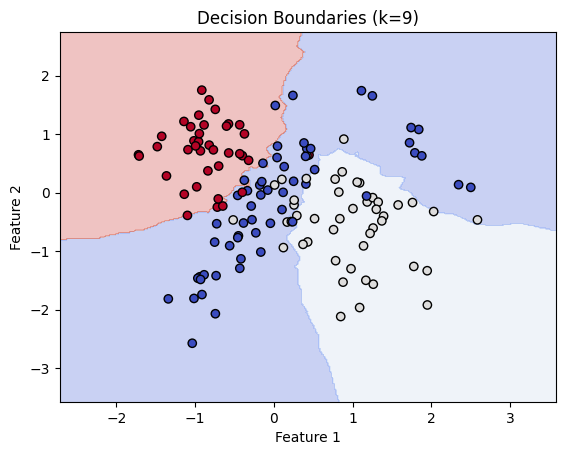

Nearest Neighbors Classifier results k =  10 


Classification Report


              precision    recall  f1-score   support

           1       0.75      0.93      0.83        56
           2       0.94      0.72      0.81        46
           3       0.94      0.89      0.92        38

    accuracy                           0.85       140
   macro avg       0.88      0.85      0.86       140
weighted avg       0.87      0.85      0.85       140

Confusion matrix

 [[52  2  2]
 [13 33  0]
 [ 4  0 34]]



Accuracy with 10 neighbor: 0.8500
Mean Classification Error with 10 neighbor: 0.1571


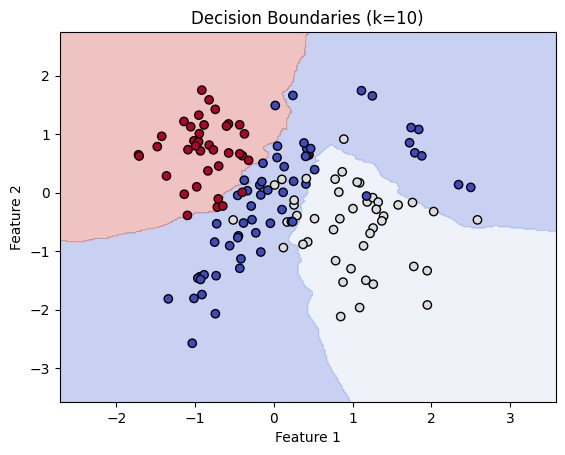

In [6]:
# Print Results and Plot Decision Boundaries for k = 1, ... , 10
for i in range (10):
  accuracy, mean_classification_error, knn_model = knn_classifier(i+1, X_train, y_train.values.ravel(), X_test, y_test)
  print(f"Accuracy with {i+1} neighbor: {accuracy:0.4f}")
  print(f"Mean Classification Error with {i+1} neighbor: {mean_classification_error:0.4f}")

  # Plot decision boundaries
  plot_decision_boundary(X_test, y_test, knn_model, f'Decision Boundaries (k={i+1})')

